In [93]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cv2 as cv

## Gathering x and y Data from hdf5

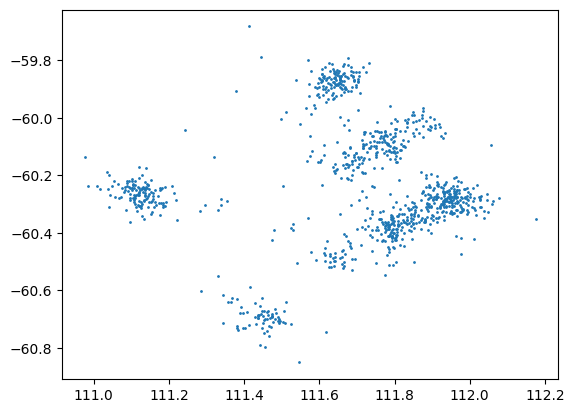

In [94]:
def collect_data(filename):
    
    # Open the file
    with h5py.File(filename, 'r') as f:
        # locs
        locs = f['locs']
        
        x_values = locs['x'][:]
        y_values = locs['y'][:]
        
    data = {
        'x': x_values,
        'y': y_values,
    }
    
    return pd.DataFrame(data)



#testing
data = collect_data('data/test_1.hdf5')

#plotting
plt.scatter(data['x'],- data['y'], s=1)
plt.show()



## Using Kmeans clustering function

[1 1 1 3 3 7 7 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 1 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 1 1 1 1 1 1 1 1 7 1 1 1 1 7 7 1 1 1 7 2 2 2 2 1
 1 1 1 1 1 1 1 1 1 1 4 4 4 5 5 5 5 5 3 3 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 7 3
 3 6 6 6 6 6 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 6 6 6 0 3 6 6 6 6 6 6 6 6 6 6 6 7 3 3 6 6 0 2 6 6 4 4 4 4 2 2 3
 3 3 3 2 4 4 3 3 3 3 3 3 6 6 3 3 2 2 2 2 2 2 4 7 7 3 3 6 6 6 6 6 6 6 3 6 3
 6 3 3 3 3 3 3 3 1 7 7 7 7 7 7 7 7 7 7 1 1 1 1 3 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 3 3 5 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 4 4 4 4 0 0 3 0 0 0 0 1
 1 4 4 4 2 2 2 2 2 2 2 1 1 7 7 7 6 6 6 0 0 0 0 0 0 0 0 0 2 2 2 2 2 7 2 2 2
 2 4 7 3 3 0 0 0 0 0 0 0 0 0 0 0 0 5 5 4 4 4 4 4 4 4 7 7 7 7 7 7 0 4 6 6 6
 3 3 3 7 7 7 7 4 4 4 4 4 4 4 4 4 4 2 4 1 1 1 1 1 1 5 5 5 5 2 6 6 6 6 6 5 5
 4 7 1 1 1 0 3 3 7 2 2 3 3 3 3 6 6 2 2 1 4 4 4 4 4 5 5 5 5 5 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 4 4 1 6 6 6 6 7 7
 7 7 7 0 0 0 0 0 0 0 4 4 

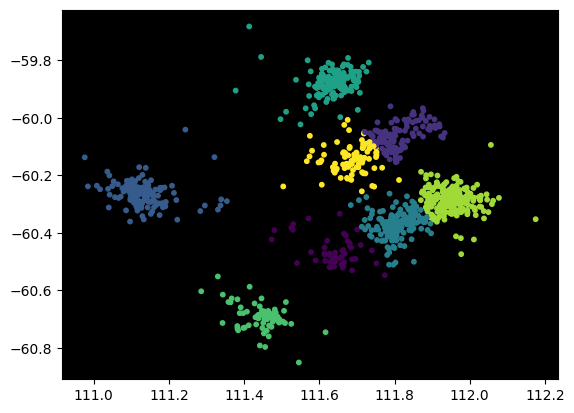

In [95]:
def find_clusters_k_means(data, k):
    kmeans = KMeans(n_clusters=k, random_state = 42 , init= 'k-means++')
    kmeans.fit(data)
    return kmeans.labels_

#testing
labels = find_clusters_k_means(data, 8)
print(labels)

#plotting
plt.axes().set_facecolor('black')
plt.scatter(data['x'], -data['y'], c=labels, cmap='viridis', s=10)
plt.show()



# Finding the center of mass for each cluster

[(np.float32(111.6388), np.float32(60.46383)), (np.float32(111.81368), np.float32(60.061646)), (np.float32(111.1327), np.float32(60.26338)), (np.float32(111.805565), np.float32(60.373165)), (np.float32(111.63653), np.float32(59.876465)), (np.float32(111.443954), np.float32(60.693012)), (np.float32(111.95023), np.float32(60.285942)), (np.float32(111.68582), np.float32(60.143295))]


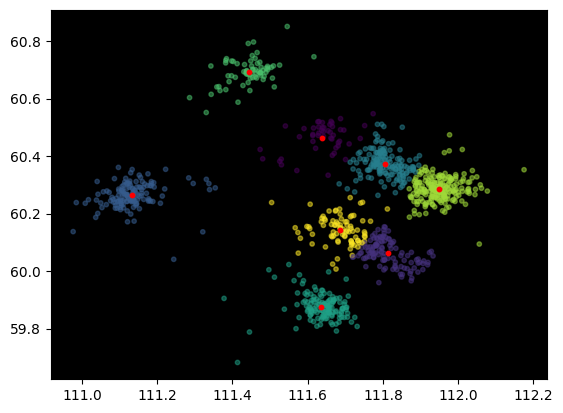

[[111.6388    60.46383 ]
 [111.81368   60.061646]
 [111.1327    60.26338 ]
 [111.805565  60.373165]
 [111.63653   59.876465]
 [111.443954  60.693012]
 [111.95023   60.285942]
 [111.68582   60.143295]]


In [96]:
def find_com(data, labels):
    com = []
    for i in range(max(labels)+1):
        x = np.mean(data['x'][labels == i])
        y = np.mean(data['y'][labels == i])
        com.append((x, y))
    return com

#testing
com = find_com(data, labels)

print(com)

#plotting
#background color is black
plt.axes().set_facecolor('black')
plt.scatter(data['x'], data['y'], c=labels, cmap='viridis', s=10, alpha=0.5)
com = np.array(com)
plt.scatter(com[:, 0], com[:, 1], c='red', s=10)
plt.show()

print(com)

## Finding the minimum bounding rectangle for the com

/tmp/ipykernel_3018/1807062350.py:60: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  return np.abs(np.cross(line_end - line_start, point - line_start) / np.linalg.norm(line_end - line_start))


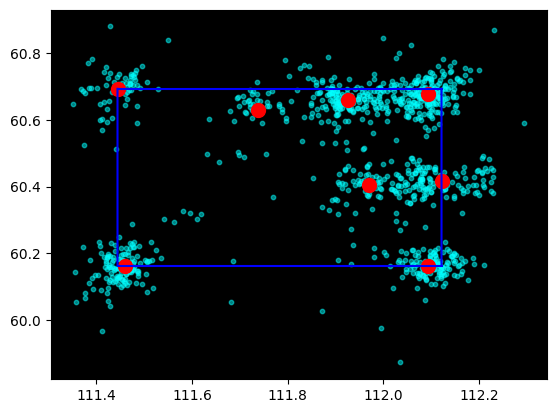

New COM points after rotation:
[[111.73808047  60.62992515]
 [112.12174004  60.41746271]
 [111.45877151  60.1626909 ]
 [111.92556377  60.65958922]
 [112.09402463  60.16269328]
 [111.44395521  60.69301767]
 [112.09342769  60.67852499]
 [111.97060097  60.40434372]]


In [97]:
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt

def minimum_bounding_rectangle(points):
    """
    Find the smallest bounding rectangle for a set of points.
    Returns a set of points representing the corners of the bounding box.
    """
    pi2 = np.pi / 2

    # Get the convex hull for the points
    hull_points = points[ConvexHull(points).vertices]

    # Calculate edge angles
    edges = hull_points[1:] - hull_points[:-1]
    angles = np.arctan2(edges[:, 1], edges[:, 0])
    angles = np.abs(np.mod(angles, pi2))
    angles = np.unique(angles)

    # Find rotation matrices
    rotations = np.vstack([
        np.cos(angles),
        np.cos(angles - pi2),
        np.cos(angles + pi2),
        np.cos(angles)
    ]).T
    rotations = rotations.reshape((-1, 2, 2))

    # Apply rotations to the hull
    rot_points = np.dot(rotations, hull_points.T)

    # Find the bounding points
    min_x = np.nanmin(rot_points[:, 0], axis=1)
    max_x = np.nanmax(rot_points[:, 0], axis=1)
    min_y = np.nanmin(rot_points[:, 1], axis=1)
    max_y = np.nanmax(rot_points[:, 1], axis=1)

    # Find the box with the best area
    areas = (max_x - min_x) * (max_y - min_y)
    best_idx = np.argmin(areas)

    # Return the best box
    x1, x2 = max_x[best_idx], min_x[best_idx]
    y1, y2 = max_y[best_idx], min_y[best_idx]
    r = rotations[best_idx]

    rval = np.zeros((4, 2))
    rval[0] = np.dot([x1, y2], r)
    rval[1] = np.dot([x2, y2], r)
    rval[2] = np.dot([x2, y1], r)
    rval[3] = np.dot([x1, y1], r)

    return rval

def distance_to_line(point, line_start, line_end):
    """Calculate the perpendicular distance from a point to a line."""
    if np.all(line_start == line_end):
        return np.linalg.norm(point - line_start)
    return np.abs(np.cross(line_end - line_start, point - line_start) / np.linalg.norm(line_end - line_start))

def find_closest_side(points, rectangle):
    """Find the side of the rectangle with the most points closest to it."""
    distances = np.zeros((4, len(points)))
    for i in range(4):
        line_start, line_end = rectangle[i], rectangle[(i + 1) % 4]
        for j, point in enumerate(points):
            distances[i, j] = distance_to_line(point, line_start, line_end)
    min_distances = np.argmin(distances, axis=0)
    closest_side = np.bincount(min_distances).argmax()
    return closest_side

def find_rotation_angle(rectangle, closest_side):
    """
    Find the rotation angle to make the closest side the top side.
    """
    rotation_angle = -np.arctan2(
        rectangle[(closest_side + 1) % 4, 1] - rectangle[closest_side, 1],
        rectangle[(closest_side + 1) % 4, 0] - rectangle[closest_side, 0]
    )
    return rotation_angle

def rotate_points(points, rotation_angle, pivot):
    """
    Rotate the given points around the pivot by the given rotation angle.
    """
    rotation_matrix = np.array([
        [np.cos(rotation_angle), -np.sin(rotation_angle)],
        [np.sin(rotation_angle), np.cos(rotation_angle)]
    ])
    rotated_points = np.dot(points - pivot, rotation_matrix.T) + pivot
    return rotated_points


min_bounding_rect = minimum_bounding_rectangle(com)
closest_side = find_closest_side(com, min_bounding_rect)
rotation_angle = find_rotation_angle(min_bounding_rect, closest_side)

# Rotate data and COM points
rotated_data = rotate_points(data, rotation_angle, min_bounding_rect[closest_side])
rotated_com = rotate_points(com, rotation_angle, min_bounding_rect[closest_side])
rotated_rect = rotate_points(min_bounding_rect, rotation_angle, min_bounding_rect[closest_side])

# Plotting the result
plt.axes().set_facecolor('black')
plt.scatter(rotated_data[:, 0], rotated_data[:, 1], color='cyan', s=10, alpha=0.5)
plt.scatter(rotated_com[:, 0], rotated_com[:, 1], color='red', s=100)
for i in range(4):
    plt.plot([rotated_rect[i, 0], rotated_rect[(i + 1) % 4, 0]], 
             [rotated_rect[i, 1], rotated_rect[(i + 1) % 4, 1]], 'b-')

plt.show()

# New COM points after rotation
print("New COM points after rotation:")
print(rotated_com)


In [98]:
def find_middle_left_most_com(rotated_com):
    # sort each com the rotated_com based on its x value
    sorted_com = rotated_com[rotated_com[:, 0].argsort()][:3]
    # print(sorted_com)

    # find the second_highest y value in sorted_com
    for com in sorted_com:
        if com[1] != max(sorted_com[:, 1]) and com[1] != min(sorted_com[:, 1]):
            second_highest_com = com
            break
    return second_highest_com

def find_right_most_com(rotated_com):
    return rotated_com[rotated_com[:, 0].argsort()][-1]

def second_right_most_com(rotated_com):
    return rotated_com[rotated_com[:, 0].argsort()][-2]

In [99]:
second_highest_com = find_middle_left_most_com(rotated_com)
right_most_com = find_right_most_com(rotated_com)
second_right_most_com = second_right_most_com(rotated_com)

In [100]:
def find_robot(rotated_com):
    # find the com closest to the center of the bounded rectangle
    center_x = ((right_most_com[0] - second_highest_com[0]) / 2) + second_highest_com[0]
    center_y = ((right_most_com[1] - second_right_most_com[1]) / 2) + second_right_most_com[1] 
    
    distances = np.sqrt((rotated_com[:, 0] - center_x) ** 2 + (rotated_com[:, 1] - center_y) ** 2)
    closest_com_index = np.argmin(distances)
    closest_com = rotated_com[closest_com_index]
    
    return closest_com

In [101]:
robot = find_robot(rotated_com)

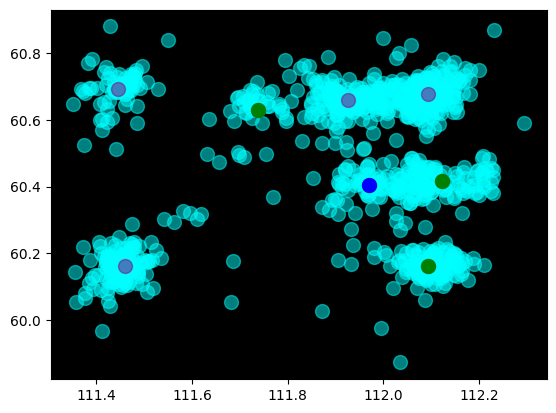

In [102]:
# Plotting second_high_com, right_most_com and second_right_most_com as green points on top of rotated data and rotated com over a scatter plot with cyan points and black background
plt.axes().set_facecolor('black')
plt.scatter(rotated_data[:, 0], rotated_data[:, 1], color='cyan', s=100, alpha=0.5)
plt.scatter(rotated_com[:, 0], rotated_com[:, 1], color='purple', s=100, alpha=0.5)
plt.scatter(robot[0], robot[1], color='blue', s=100)
plt.scatter(second_highest_com[0], second_highest_com[1], color='green', s=100)
plt.scatter(right_most_com[0], right_most_com[1], color='green', s=100)
plt.scatter(second_right_most_com[0], second_right_most_com[1], color='green', s=100)
plt.show()


## Calculate Ratio for Robot Distance

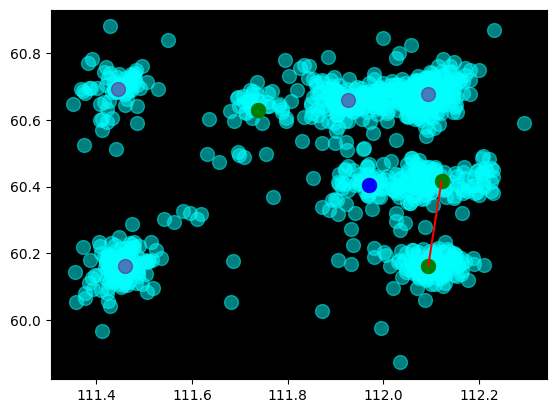

In [103]:
# plot the line between right_most_com and second_right_most_com over the rotated data and rotated com in scatterplot with cyan points and black background 
plt.axes().set_facecolor('black')
plt.scatter(rotated_data[:, 0], rotated_data[:, 1], color='cyan', s=100, alpha=0.5)
plt.scatter(rotated_com[:, 0], rotated_com[:, 1], color='purple', s=100, alpha=0.5)
plt.scatter(robot[0], robot[1], color='blue', s=100)
plt.scatter(second_highest_com[0], second_highest_com[1], color='green', s=100)
plt.scatter(right_most_com[0], right_most_com[1], color='green', s=100)
plt.scatter(second_right_most_com[0], second_right_most_com[1], color='green', s=100)
plt.plot([right_most_com[0], second_right_most_com[0]], [right_most_com[1], second_right_most_com[1]], color='red')
plt.show()

In [104]:
def calculate_exact_ratio(rotated_data, rotated_com, second_highest_com, robot, right_most_com, second_right_most_com):
    
    def distance_point_to_line(point, line):
        x0, y0 = point
        x1, y1 = line[0]
        x2, y2 = line[1]
        return np.abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1) / np.sqrt((y2-y1)**2 + (x2-x1)**2)

    def intersection_between_point_line(point, line):
        x0, y0 = point
        x1, y1 = line[0]
        x2, y2 = line[1]
        m = (y2-y1) / (x2-x1)
        c = y1 - m*x1
        x = (m*y0 + x0 - m*c) / (m**2 + 1)
        y = m*x + c
        return x, y
    
    # Plotting the 2D scatter plot of the rotated_data with cyan points, rotated_com as green points, and black background
    plt.axes().set_facecolor('black')
    plt.scatter(rotated_data[:, 0], rotated_data[:, 1], color='cyan')
    plt.scatter(rotated_com[:, 0], rotated_com[:, 1], color='green')
    plt.show()
    
    # Show image with rightmost and second rightmost contours
    plt.axes().set_facecolor('black')
    plt.scatter(rotated_data[:, 0], rotated_data[:, 1], color='cyan', s=10, alpha=0.5)
    plt.scatter(rotated_com[:, 0], rotated_com[:, 1], color='purple', s=100, alpha=0.5)
    plt.scatter(right_most_com[0], right_most_com[1], color='green', s=100)
    plt.scatter(second_right_most_com[0], second_right_most_com[1], color='green', s=100)
    plt.show()

    # Step 2: Finding the leftmost com
    left_most_com = second_highest_com

    # Show image with leftmost com
    plt.axes().set_facecolor('black')
    plt.scatter(rotated_data[:, 0], rotated_data[:, 1], color='cyan', s=10, alpha=0.5)
    plt.scatter(rotated_com[:, 0], rotated_com[:, 1], color='purple', s=100, alpha=0.5)
    plt.scatter(left_most_com[0], left_most_com[1], color='green', s=100)
    plt.show()

    # Step 3: Finding the robot com
    robot_com = robot

    # Show image with robot
    plt.axes().set_facecolor('black')
    plt.scatter(rotated_data[:, 0], rotated_data[:, 1], color='cyan', s=10, alpha=0.5)
    plt.scatter(rotated_com[:, 0], rotated_com[:, 1], color='purple', s=100, alpha=0.5)
    plt.scatter(robot_com[0], robot_com[1], color='green', s=100)

    # Step 4: Define the right line using the centers of the rightmost and second rightmost contours
    right_line = [(right_most_com[0], right_most_com[1]), (second_right_most_com[0], second_right_most_com[1])]

    # Calculate the distance of the left point from the right line
    distance_left_to_right_line = distance_point_to_line(left_most_com, right_line)

    # Calculate the distance of the center of mass point from the right line
    distance_center_of_mass_to_right_line = distance_point_to_line(robot_com, right_line)

    # Step 5: Calculate the exact ratio
    ratio = distance_center_of_mass_to_right_line / distance_left_to_right_line
    
    # Step 6: Getting the intersection points
    intersection_point_x, intersection_point_y = intersection_between_point_line(left_most_com, right_line)
    intersection_point_x_robot_com, intersection_point_y_robot_com = intersection_between_point_line(robot_com, right_line)
    
    # Step 7: Drawing all the robot_com, left_most_com, right_most_com, second_right_most_com, and lines on scatter plot
    plt.axes().set_facecolor('black')
    plt.scatter(rotated_data[:, 0], rotated_data[:, 1], color='cyan', s=10, alpha=0.5)
    plt.scatter(rotated_com[:, 0], rotated_com[:, 1], color='purple', s=100, alpha=0.5)
    plt.scatter(robot_com[0], robot_com[1], color='green', s=100)
    plt.scatter(left_most_com[0], left_most_com[1], color='green', s=100)
    plt.scatter(right_most_com[0], right_most_com[1], color='green', s=100)
    plt.scatter(second_right_most_com[0], second_right_most_com[1], color='green', s=100)
    plt.plot([right_most_com[0], second_right_most_com[0]], [right_most_com[1], second_right_most_com[1]], color='red')
    # draw a line between second_highest_com and (intersection_point_x, intersection_point_y)
    plt.plot([second_highest_com[0], intersection_point_x], [second_highest_com[1], intersection_point_y], color='yellow')
    # draw a line between robot_com and (intersection_point_x_robot_com, intersection_point_y_robot_com)
    plt.plot([robot_com[0], intersection_point_x_robot_com], [robot_com[1], intersection_point_y_robot_com], color='yellow')
    plt.show()
    
    print("Ratio: " + str(ratio))
    
    # # Show and save the final image
    # show_and_save(final_avg_image, 'Final Image with Centers and Lines', 'final_step.png')
    
    # return ratio, distance_left_to_right_line, distance_center_of_mass_to_right_line

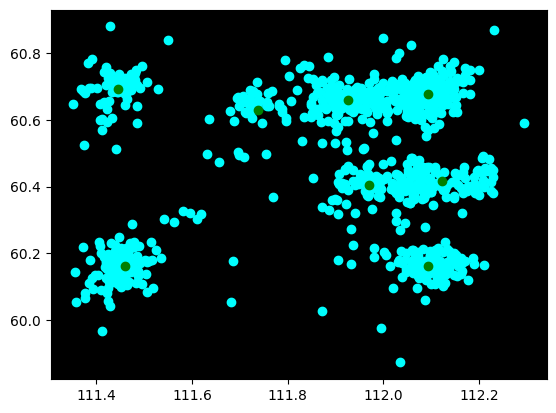

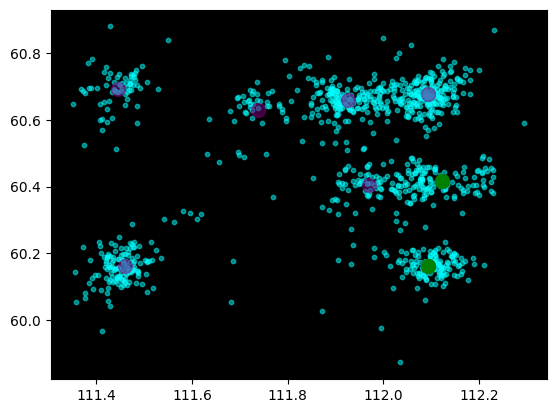

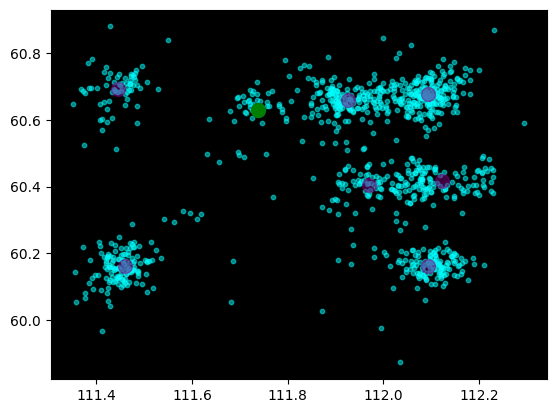

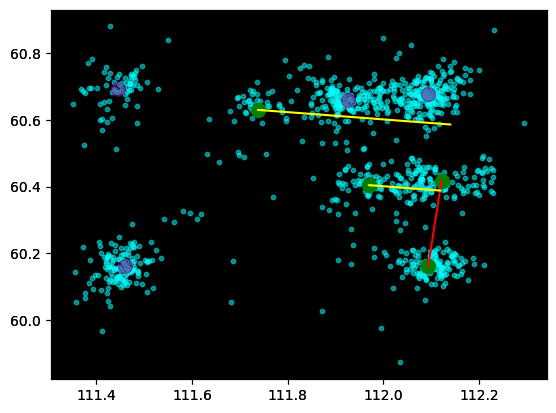

Ratio: 0.3680482008778627


In [105]:
calculate_exact_ratio(rotated_data, rotated_com, second_highest_com, robot, right_most_com, second_right_most_com)

In [106]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import h5py
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt

In [111]:
def collect_data(filename):
    
    # Open the file
    with h5py.File(filename, 'r') as f:
        # locs
        locs = f['locs']
        
        x_values = locs['x'][:]
        y_values = locs['y'][:]
        
    data = {
        'x': x_values,
        'y': y_values,
    }
    
    return pd.DataFrame(data)

def find_clusters_k_means(data, k):
    kmeans = KMeans(n_clusters=k, random_state = 42 , init= 'k-means++')
    kmeans.fit(data)
    return kmeans.labels_

def find_com(data, labels):
    com = []
    for i in range(max(labels)+1):
        x = np.mean(data['x'][labels == i])
        y = np.mean(data['y'][labels == i])
        com.append((x, y))
    return com
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt

def minimum_bounding_rectangle(points):
    """
    Find the smallest bounding rectangle for a set of points.
    Returns a set of points representing the corners of the bounding box.
    """
    pi2 = np.pi / 2

    # Get the convex hull for the points
    hull_points = points[ConvexHull(points).vertices]

    # Calculate edge angles
    edges = hull_points[1:] - hull_points[:-1]
    angles = np.arctan2(edges[:, 1], edges[:, 0])
    angles = np.abs(np.mod(angles, pi2))
    angles = np.unique(angles)

    # Find rotation matrices
    rotations = np.vstack([
        np.cos(angles),
        np.cos(angles - pi2),
        np.cos(angles + pi2),
        np.cos(angles)
    ]).T
    rotations = rotations.reshape((-1, 2, 2))

    # Apply rotations to the hull
    rot_points = np.dot(rotations, hull_points.T)

    # Find the bounding points
    min_x = np.nanmin(rot_points[:, 0], axis=1)
    max_x = np.nanmax(rot_points[:, 0], axis=1)
    min_y = np.nanmin(rot_points[:, 1], axis=1)
    max_y = np.nanmax(rot_points[:, 1], axis=1)

    # Find the box with the best area
    areas = (max_x - min_x) * (max_y - min_y)
    best_idx = np.argmin(areas)

    # Return the best box
    x1, x2 = max_x[best_idx], min_x[best_idx]
    y1, y2 = max_y[best_idx], min_y[best_idx]
    r = rotations[best_idx]

    rval = np.zeros((4, 2))
    rval[0] = np.dot([x1, y2], r)
    rval[1] = np.dot([x2, y2], r)
    rval[2] = np.dot([x2, y1], r)
    rval[3] = np.dot([x1, y1], r)

    return rval

def distance_to_line(point, line_start, line_end):
    """Calculate the perpendicular distance from a point to a line."""
    if np.all(line_start == line_end):
        return np.linalg.norm(point - line_start)
    return np.abs(np.cross(line_end - line_start, point - line_start) / np.linalg.norm(line_end - line_start))

def find_closest_side(points, rectangle):
    """Find the side of the rectangle with the most points closest to it."""
    distances = np.zeros((4, len(points)))
    for i in range(4):
        line_start, line_end = rectangle[i], rectangle[(i + 1) % 4]
        for j, point in enumerate(points):
            distances[i, j] = distance_to_line(point, line_start, line_end)
    min_distances = np.argmin(distances, axis=0)
    closest_side = np.bincount(min_distances).argmax()
    return closest_side

def find_rotation_angle(rectangle, closest_side):
    """
    Find the rotation angle to make the closest side the bottom side.
    """
    rotation_angle = -np.arctan2(
        rectangle[(closest_side + 1) % 4, 1] - rectangle[closest_side, 1],
        rectangle[(closest_side + 1) % 4, 0] - rectangle[closest_side, 0]
    )
    return rotation_angle + np.pi

def rotate_points(points, rotation_angle, pivot):
    """
    Rotate the given points around the pivot by the given rotation angle.
    """
    rotation_matrix = np.array([
        [np.cos(rotation_angle), -np.sin(rotation_angle)],
        [np.sin(rotation_angle), np.cos(rotation_angle)]
    ])
    rotated_points = np.dot(points - pivot, rotation_matrix.T) + pivot
    return rotated_points



def find_middle_left_most_com(rotated_com):
    # Sort each com in rotated_com based on its x value and take the first 3
    sorted_com = rotated_com[rotated_com[:, 0].argsort()][:3]
    
    # Find the second highest y value in sorted_com
    for com in sorted_com:
        if com[1] != max(sorted_com[:, 1]) and com[1] != min(sorted_com[:, 1]):
            second_highest_com = com
            break
    return second_highest_com

def find_right_most_coms(rotated_com):
    # Sort each com in rotated_com based on its x value
    sorted_com = rotated_com[rotated_com[:, 0].argsort()]
    right_most_com = sorted_com[-1]
    second_right_most_com = sorted_com[-2]
    return right_most_com, second_right_most_com

def find_robot(rotated_com):
    # find the com closest to the center of the bounded rectangle
    center_x = ((right_most_com[0] - second_highest_com[0]) / 2) + second_highest_com[0]
    center_y = ((right_most_com[1] - second_right_most_com[1]) / 2) + second_right_most_com[1] 
    
    distances = np.sqrt((rotated_com[:, 0] - center_x) ** 2 + (rotated_com[:, 1] - center_y) ** 2)
    closest_com_index = np.argmin(distances)
    closest_com = rotated_com[closest_com_index]
    
    return closest_com
#drawing line between two points without using cv2
def draw_line_between_points(p1, p2, color='white'):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], color=color)
    

def draw_line_between_point_and_line( p1, p2, p3):
    
    #finding the intersection point
    right_line = np.array([p1, p2])
    intersection_x, intersection_y = intersection_between_point_line(p3, right_line)
    intersection_point = np.array([intersection_x, intersection_y])
    
    #plotting the points between the points p3 and intersection point
    plt.plot([p3[0], intersection_point[0]], [p3[1], intersection_point[1]], color='magenta')

def calculate_exact_ratio(rotated_data, rotated_com, second_highest_com, robot_com, right_most_com, second_right_most_com):
    def distance_point_to_line(point, line):
        x0, y0 = point
        x1, y1 = line[0]
        x2, y2 = line[1]
        return np.abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1) / np.sqrt((y2-y1)**2 + (x2-x1)**2)

    right_line = np.array([right_most_com, second_right_most_com])
    intersection_point = intersection_between_point_line(robot_com, right_line)
    normalizing_point = intersection_between_point_line(second_highest_com, right_line)
    robot_distance = distance_point_to_line(robot_com, right_line)
    normalizing_distance = distance_point_to_line(second_highest_com, right_line)
    ratio = robot_distance / normalizing_distance

    plt.axes().set_facecolor('black')
    ax = plt.gca()
    ax.invert_yaxis()  # Invert y-axis to correct orientation
    plt.scatter(rotated_data[:, 0], rotated_data[:, 1], color='cyan', s=10, alpha=0.5)
    plt.scatter(rotated_com[:, 0], rotated_com[:, 1], color='red', s=10)
    plt.scatter(second_highest_com[0], second_highest_com[1], color='magenta', s=10)
    plt.scatter(right_most_com[0], right_most_com[1], color='magenta', s=10)
    plt.scatter(second_right_most_com[0], second_right_most_com[1], color='magenta', s=10)
    plt.scatter(robot_com[0], robot_com[1], color='magenta', s=10)

    draw_line_between_points(right_most_com, second_right_most_com, color='magenta')
    draw_line_between_point_and_line(right_most_com, second_right_most_com, robot_com)
    draw_line_between_point_and_line(second_right_most_com, right_most_com, second_highest_com)

    plt.show()

    return ratio


In [117]:
def plot_helper(data=None, labels=None, com=None, rotated_data=None, rotated_com=None, rotated_rect=None, second_highest_com=None, right_most_com=None, second_right_most_com=None, robot_com=None, title="Plot"):
    plt.figure(figsize=(10, 10))
    ax = plt.gca()
    ax.set_facecolor('black')
    ax.invert_yaxis()  # Invert y-axis to correct orientation
    
    if data is not None and labels is not None:
        plt.scatter(data['x'], data['y'], c=labels, cmap='viridis', s=10, alpha=0.5)
    elif data is not None:
        plt.scatter(data['x'], data['y'], s=10, alpha=0.5)
    else :
        print("Data is None")

    if com is not None:
        com = np.array(com)
        plt.scatter(com[:, 0], com[:, 1], c='red', s=100, label='COMs')
    else :
        print("COM is None")

    if rotated_data is not None:
        plt.scatter(rotated_data[:, 0], rotated_data[:, 1], color='cyan', s=10, alpha=0.5)
    else : 
        print("Rotated Data is None")

    if rotated_com is not None:
        plt.scatter(rotated_com[:, 0], rotated_com[:, 1], color='red', s=100, label='Rotated COMs')
    else : 
        print("Rotated COM is None")

    if rotated_rect is not None:
        for i in range(4):
            plt.plot([rotated_rect[i, 0], rotated_rect[(i + 1) % 4, 0]], 
                     [rotated_rect[i, 1], rotated_rect[(i + 1) % 4, 1]], 'b-')

    if second_highest_com is not None:
        plt.scatter(second_highest_com[0], second_highest_com[1], color='magenta', s=100, label='Second Highest COM')
    else :
        print("Second Highest COM is None")

    if right_most_com is not None:
        plt.scatter(right_most_com[0], right_most_com[1], color='magenta', s=100, label='Right Most COM')
    else :
        print("Right Most COM is None")

    if second_right_most_com is not None:
        plt.scatter(second_right_most_com[0], second_right_most_com[1], color='magenta', s=100, label='Second Right Most COM')
    else : 
        print("Second Right Most COM is None")

    if robot_com is not None:
        plt.scatter(robot_com[0], robot_com[1], color='magenta', s=100, label='Robot COM')
    else : 
        print("Robot COM is None")
        
    plt.title(title)
    plt.legend()
    plt.show()


def process_origami_ratio(filename, k):
    data = collect_data(filename)
    plot_helper(data=data, title="Initial Data")
    
    labels = find_clusters_k_means(data, k)
    plot_helper(data=data, labels=labels, title="K-Means Clustering")

    com = find_com(data, labels)
    plot_helper(data=data, labels=labels, com=com, title="Centers of Mass")

    min_bounding_rect = minimum_bounding_rectangle(np.array(com))
    closest_side = find_closest_side(np.array(com), min_bounding_rect)
    rotation_angle = find_rotation_angle(min_bounding_rect, closest_side)
    
    rotated_data = rotate_points(data.values, rotation_angle, min_bounding_rect[closest_side])
    rotated_com = rotate_points(np.array(com), rotation_angle, min_bounding_rect[closest_side])
    
    print('rotated_com:', rotated_com)
    
    rotated_rect = rotate_points(min_bounding_rect, rotation_angle, min_bounding_rect[closest_side])
    plot_helper(rotated_data=rotated_data, rotated_com=rotated_com, rotated_rect=rotated_rect, title="Rotated Data and COMs")

    second_highest_com = find_middle_left_most_com(rotated_com)
    right_most_com, second_right_most_com = find_right_most_coms(rotated_com)
    robot_com = find_robot(rotated_com)
    

    ratio = calculate_exact_ratio(rotated_data, rotated_com, second_highest_com, robot_com, right_most_com, second_right_most_com)
    print("Ratio:", ratio)

    return ratio


Rotated COM is None
Second Highest COM is None
Right Most COM is None
Second Right Most COM is None
Robot COM is None


/tmp/ipykernel_3018/733482257.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


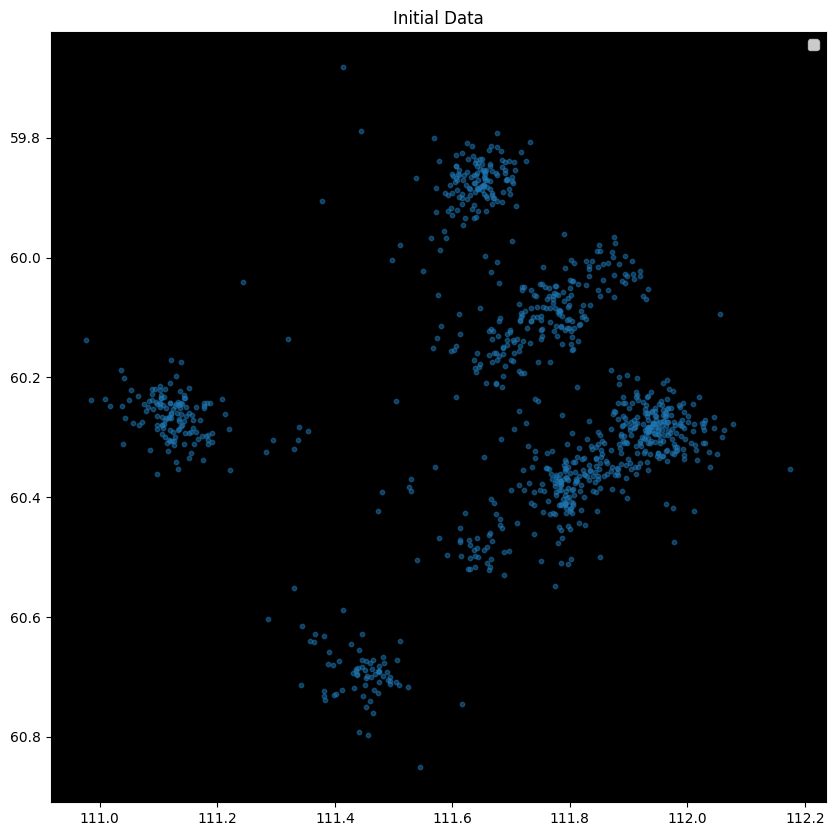

Rotated COM is None
Second Highest COM is None
Right Most COM is None
Second Right Most COM is None
Robot COM is None


/tmp/ipykernel_3018/733482257.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


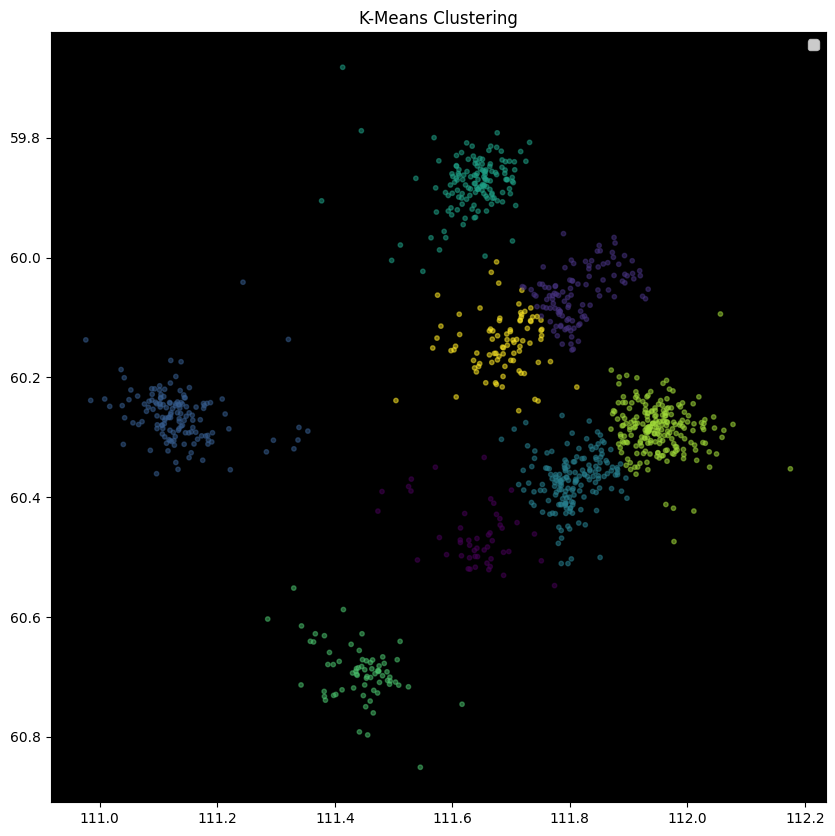

Rotated COM is None
Second Highest COM is None
Right Most COM is None
Second Right Most COM is None
Robot COM is None


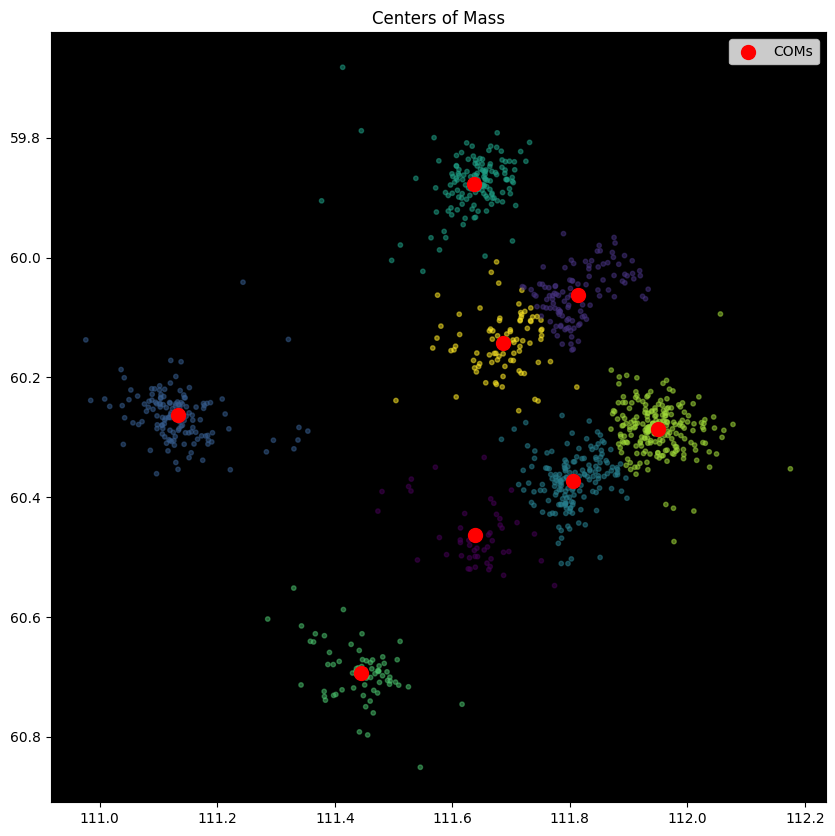

rotated_com: [[111.14981321  60.75610696]
 [110.76615364  60.96856939]
 [111.42912216  61.2233412 ]
 [110.96232991  60.72644289]
 [110.79386904  61.22333883]
 [111.44393846  60.69301443]
 [110.79446599  60.70750712]
 [110.91729271  60.98168839]]
Second Highest COM is None
Right Most COM is None
Second Right Most COM is None
Robot COM is None


/tmp/ipykernel_3018/2173638642.py:89: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  return np.abs(np.cross(line_end - line_start, point - line_start) / np.linalg.norm(line_end - line_start))


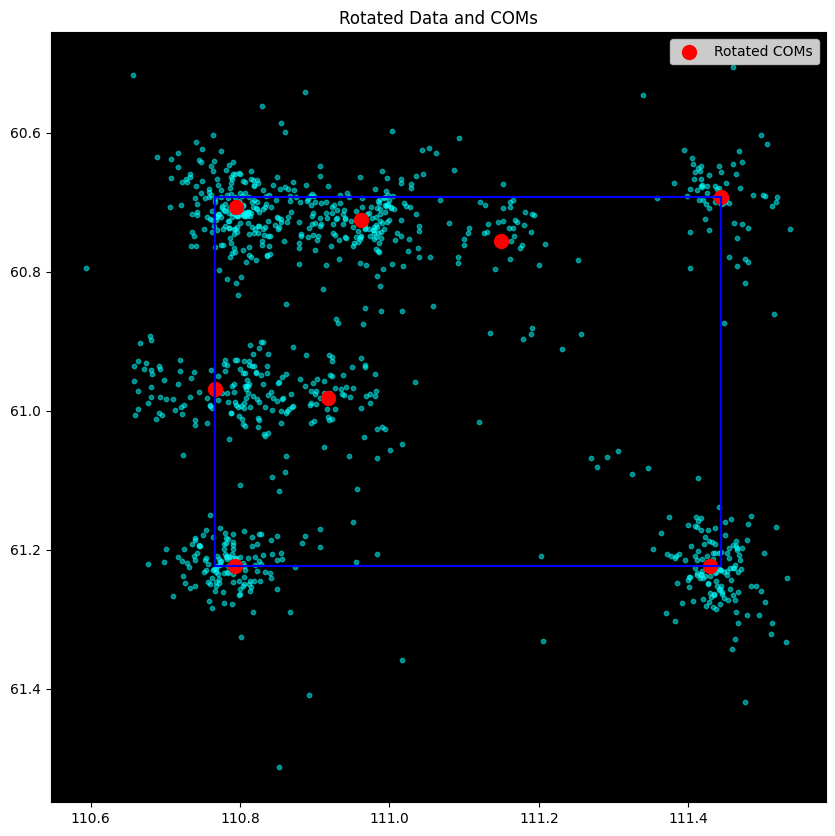

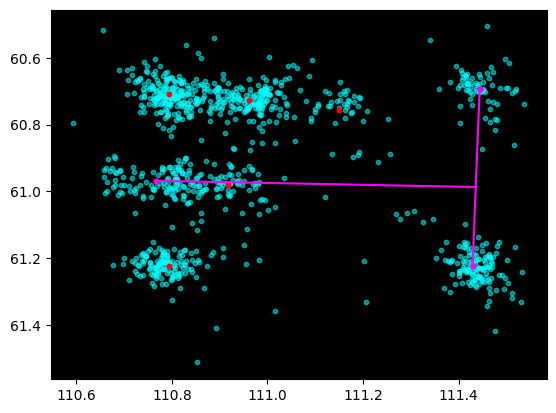

Ratio: 0.0
0.0


In [118]:
#testing
ratio = process_origami_ratio('data/test_1.hdf5', 8)
print(ratio)